<a href="https://colab.research.google.com/github/sujin-create/finedu/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%20%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98%EC%9D%84%20%EC%9D%B4%EC%9A%A9%ED%95%9C%20%ED%88%AC%EC%9E%90%EC%A0%84%EB%9E%B5/%EA%B8%88%EC%9C%B5_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EA%B0%95%EC%9D%98_8%EA%B0%95_Keras%EB%A5%BC_%EC%9D%B4%EC%9A%A9%ED%95%9C_%ED%9A%8C%EA%B7%80_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

금융 데이터 분석 강의 5강에서 선형 회귀를 한 적이 있습니다.

무료 텐서플로우 강의 링크(선형 회귀 편) : https://www.boostcourse.org/ai212/lecture/41159  

코드는 좀 다를 수 있는데, 개념 설명 자체는 동일하므로 참고 한 번 해보시면 좋을 것 같습니다.

#1. 데이터 로드

국내 주식과 미국 주식의 상관관계를 비교해봅시다. 2010년 6월 1일부터 현재까지 KOSPI 지수와 다우존스 지수 데이터를 구해봅시다.

In [1]:
pip install -U finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


1강에서 소개했던 패키지인 파이낸셜데이터 리더를 통해서 다우존스지수와 코스피 지수를 불러옵니다.

링크 : https://github.com/FinanceData/FinanceDataReader

In [2]:
import FinanceDataReader as fdr

파이낸셜데이터 리더는 기본적으로 판다스의 데이터프레임 형태로 데이터를 로드합니다.  
둘 다 2010년 6월 1일 기준으로 데이터를 로드하겠습니다.

In [3]:
dow = fdr.DataReader('DJI', '2010-06-01')
dow.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2010-06-01,10024.02,10133.94,10218.33,10013.90,221900000.0,-0.0111
2010-06-02,10249.54,10025.61,10254.22,10025.61,200850000.0,0.0225
2010-06-03,10255.28,10250.67,10315.21,10175.02,176870000.0,0.0006
2010-06-04,9931.97,10249.61,10249.69,9889.88,256600000.0,-0.0315
2010-06-07,9816.49,9931.75,9982.38,9810.30,222940000.0,-0.0116


In [5]:
kospi = fdr.DataReader('KS11', '2010-06-01')
kospi.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2010-06-01,1630.40,1634.55,1643.08,1623.40,314100000.0,-0.0066
2010-06-03,1661.84,1643.74,1663.67,1641.77,308760000.0,0.0193
2010-06-04,1664.13,1660.99,1670.94,1658.52,286090000.0,0.0014
2010-06-07,1637.97,1628.06,1638.88,1618.57,300880000.0,-0.0157
2010-06-08,1651.48,1635.01,1656.37,1630.43,280290000.0,0.0082


In [6]:
kospi.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2022-07-04,2300.34,2310.73,2318.31,2276.63,467960000.0,-0.0022
2022-07-05,2341.78,2322.11,2344.08,2309.62,323900000.0,0.0180
2022-07-06,2292.01,2330.11,2332.14,2290.33,410730000.0,-0.0213
2022-07-07,2334.27,2308.97,2344.14,2307.90,332970.0,0.0184
2022-07-08,2350.61,2352.49,2367.84,2348.74,396980.0,0.0070


In [7]:
kospi.describe()

,Close,Open,High,Low,Volume,Change
count,2988.000000,2988.000000,2988.000000,2988.000000,2.988000e+03,2988.000000
mean,2178.998243,2180.175221,2190.387671,2166.981362,4.943064e+08,0.000175
std,359.372230,359.694301,361.823178,357.333226,2.969832e+08,0.010409
min,1457.640000,1474.450000,1516.750000,1439.430000,1.722300e+05,-0.083900
25%,1958.137500,1960.327500,1966.670000,1949.425000,3.154425e+08,-0.004700
50%,2044.090000,2046.675000,2053.620000,2036.290000,3.971600e+08,0.000400
75%,2308.590000,2312.280000,2321.272500,2296.895000,5.615550e+08,0.005700
max,3305.210000,3305.460000,3316.080000,3295.440000,3.460000e+09,0.086000


In [11]:
kospi.index

DatetimeIndex(['2010-06-01', '2010-06-03', '2010-06-04', '2010-06-07',
               '2010-06-08', '2010-06-09', '2010-06-10', '2010-06-11',
               '2010-06-14', '2010-06-15',
               ...
               '2022-06-27', '2022-06-28', '2022-06-29', '2022-06-30',
               '2022-07-01', '2022-07-04', '2022-07-05', '2022-07-06',
               '2022-07-07', '2022-07-08'],
              dtype='datetime64[ns]', name='Date', length=2988, freq=None)

#데이터 전처리

다우존스 지수와 KOSPI의 관계를 분석하는데 산점도(scatter plot)을 사용해봅시다. 산점도란 독립변수 x와 종속변수 y의 상관관계를 확인할 때 쓰는 그래프입니다. 가로축은 독립변수 x를, 세로축은 종속변수 y를 나타냅니다. 미국 시장과 국내 시장의 상관관계를 알아보고자 x를 다우존스 지수로 y를 KOSPI 지수로 정했습니다.

In [12]:
print(len(dow))
print(len(kospi))

3047
2988


5강에서는 산점도를 그리기 위해서 길이의 개수를 맞췄었는데 사실 회귀를 구하기 위해서도 어차피 길이를 맞춰야 합니다.

In [13]:
import pandas as pd

두 개를 하나의 데이터프레임으로 만듭니다.

In [14]:
df = pd.DataFrame({'DOW' : dow['Close'], 'KOSPI' : kospi['Close']})
df

,DOW,KOSPI
Date,,
2010-06-01,10024.02,1630.40
2010-06-02,10249.54,NaN
2010-06-03,10255.28,1661.84
2010-06-04,9931.97,1664.13
2010-06-07,9816.49,1637.97
...,...,...
2022-07-04,NaN,2300.34
2022-07-05,30967.45,2341.78
2022-07-06,31037.22,2292.01


이렇게 하면 각각의 인덱스를 기준으로 하나의 데이터프레임으로 만듭니다. 다만, 중간 중간에 결측값(NaN, 실질적인 값이 없는 경우)가 생깁니다. 데이터프레임에서 결측값의 개수를 확인하는 방법은 다음과 같스빈다.

In [15]:
df.isnull().sum()

DOW       94
KOSPI    153
dtype: int64

DOW 열에는 85개, KOSPI에는 138개의 결측값이 존재합니다. 데이터프레임의 fillna() 함수를 사용하여 결측값(NaN)을 채울 수 있는데, 인수로 bfill(backward fill)을 주면 결측값 뒤에 있는 값으로 결측값을 덮어씁니다.

In [16]:
df = df.fillna(method='bfill')
df

,DOW,KOSPI
Date,,
2010-06-01,10024.02,1630.40
2010-06-02,10249.54,1661.84
2010-06-03,10255.28,1661.84
2010-06-04,9931.97,1664.13
2010-06-07,9816.49,1637.97
...,...,...
2022-07-04,30967.45,2300.34
2022-07-05,30967.45,2341.78
2022-07-06,31037.22,2292.01


하지만 이렇게 하면 뒤에 값이 없는 맨 마지막 행의 경우에는 채워지지 않습니다.  
이 경우 ffill을 사용하면 앞의 값으로 결측값을 채웁니다.

In [17]:
# 앞의 값으로 채운다
df = df.fillna(method='ffill')
df

,DOW,KOSPI
Date,,
2010-06-01,10024.02,1630.40
2010-06-02,10249.54,1661.84
2010-06-03,10255.28,1661.84
2010-06-04,9931.97,1664.13
2010-06-07,9816.49,1637.97
...,...,...
2022-07-04,30967.45,2300.34
2022-07-05,30967.45,2341.78
2022-07-06,31037.22,2292.01


In [18]:
df.isnull().sum()

DOW      0
KOSPI    0
dtype: int64

#선형 회귀 분석

예시를 들어봅시다.  
시험 공부하는 시간을 늘리면 늘릴 수록 성적이 잘 나옵니다. 하루에 걷는 횟수를 늘릴 수록, 몸무게는 줄어듭니다. 집의 평수가 클수록, 집의 매매 가격은 비쌉니다.

이는 수학적으로 생각을 해보면 어떤 요인의 수치에 따라서 특정 요인의 수치가 영향을 받고있다고 말할 수 있습니다.  
조금 더 수학적인 표현을 써보면 어떤 변수의 값에 따라서 특정 변수의 값이 영향을 받고 있다고 볼 수 있습니다. 다른 변수의 값을 변하게하는 변수를 `x`, 변수 x에 의해서 값이 종속적으로 변하는 변수 `y`라고 해봅시다.

이때 변수 x의 값은 독립적으로 변할 수 있는 것에 반해, y값은 계속해서 x의 값에 의해서, 종속적으로 결정되므로 x를 `독립 변수`, y를 `종속 변수`라고 합니다. `선형 회귀`는 한 개 이상의 독립 변수 x와 y의 선형 관계를 모델링합니다. 만약, 독립 변수 x가 1개라면 식은 다음과 같습니다.

$$y = wx + b$$

여기서 독립 변수 x와 곱해지는 값 `w`를 머신 러닝에서는 기울기, `b`를 b를 y절편이라고 합니다.  

주어진 데이터로부터 이 데이터를 가장 잘 표현하는 직선을 찾는다는 것은 결국 적절한 `w`

와 적절한 `b` 의 값을 찾는다는 의미와 동일합니다. 흩어져 보이는 여러 데이터들에서 추세선을 구한다고도 볼 수 있겠습니다. 다음은 흩어져있는 여러 데이터로부터 적절한 `w` 와 `b`를 찾은 뒤 y = wx + b의 직선을 그린 경우를 보여줍니다.

https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/600px-Linear_regression.svg.png

데이터를 반영한 적절한 직선을 찾고나면(`w` 값과 `b` 의 값을 결정하고나면), 그 후에는 임의의 값에 대해서도 예측이 가능합니다. 가령, 위의 그래프에서 입력 x의 값이 0.5991일 때 y의 값을 예측한다는 것은 그저

$$y = wx + b$$

위의 수식에 입력 x값을 넣어본다는 이야기와 같습니다.

##시험 기간 예시

1시간을 공부했을 때 21점  
2시간을 공부했을 때 41점  
3시간을 공부했을 때 61점  

이라면 이로부터 선형 회귀를 모델링하면  
$w$는 20  
$b$는 1  

$시험성적 = w시험공부시간 + b$가 됩니다.

다시 말해 차트로 그리면  

$y=20x + 1$의 직선 차트를 그리면 됩니다.

###사이파이를 이용한 선형 회귀

사이파이는 파이썬 기반 수학, 과학, 엔지니어링용 핵심 패키지 모음입니다. 사이파이는 넘파이 기반의 함수들과 수학적 알고리즘의 모음으로 넘파이, 맷플롯립, 심파이, 판다스 등을 포함합니다. 

In [19]:
# 사이파이 설치
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


사이파이 패키지의 서브 패키지인 스탯츠(stats)는 다양한 통계 함수를 제공합니다.  

lingress() 함수를 사용하면 시리즈 두 개만으로 간단히 선형 회귀 모델을 생성하여 분석할 수 있습니다.

* model = stats.linregress(독립 변수 x, 종속 변수 y)  
* model.slope : 기울기  
* model.intercept : y절편

In [20]:
from scipy import stats

In [21]:
regr = stats.linregress(df['DOW'], df['KOSPI'])
regr

LinregressResult(slope=0.04141351610527746, intercept=1324.7820011169733, rvalue=0.8340316844072512, pvalue=0.0, stderr=0.00048896740267308)

In [22]:
# 기울기만 별도 출력
regr.slope

0.04141351610527746

In [23]:
# Y 절편만 별도 출력
regr.intercept

1324.7820011169733

* slope : 찾아낸 기울기  
* intercpet : 찾아낸 y절편  
* rvalue : r값 (상관계수)  
* pvalue : p값  
* stderr : 표준편차

위로부터 얻은 결과로부터 선형회귀 식을 구할 수 있습니다.  
기울기가 약 0.036, y절편이 1413이므로  

선형 회귀 수식은  

$$y = wx + b$$
에서 각각 w와 b를 대입하여  

$$y = 0.036x + 1407$$  
와 같습니다. 종속 변수 y가 코스피 지수, 독립 변수 x가 다우존스 지수였으므로  
$$코스피 지수 = 0.036 × 다우존스 지수 + 1407$$  

이 우리가 얻은 최종 선형 회귀 수식입니다. 이제 우리는 다우존스 지수로부터 다우 코스피 지수를 예측하는 식을 얻은 것입니다.

**!! 주의 : 위 값은 강의 영상을 녹화할 당시인 7월 02일까지의 데이터를 가지고 나온 값이므로 여러분들이 7월에 실습할 때는 7월까지의 데이터를 가지고 구하기 때문에 기울기와 y절편의 값이 제가 구했을 때와 다를 수 있습니다.**

#케라스를 이용한 선형 회귀 기초

## import 할 때 패키지 네이밍

In [28]:
from tensorflow.keras.layers     import Dense
from tensorflow.keras.models     import Sequential
from tensorflow.keras.callbacks  import ModelCheckpoint
# Adam은 sgd(일반 경사하강법)에서 보완한 더 좋은 경사하강법.
# optimizer=Adam 써주면 sgd 썼을 때보다 성능이 더 좋을 수 있습니다.
from tensorflow.keras.optimizers import Adam

## 딥러닝 실행 순서

1. 전처리: 학습에 필요한 데이터 전처리를 수행합니다.  
2. 모델링(model): 모델을 정의합니다.  
3. 컴파일(compile): 모델을 생성합니다.  
4. 학습 (fit): 모델을 학습시킵니다.

In [29]:
import tensorflow as tf

tf.keras.layers.Dense(10)

In [30]:
from tensorflow.keras.layers import Dense

Dense(10)

아래는 실제 전처리 - 모델링 - 컴파일 - 학습으로 이어지는 코드를 보여줍니다.

In [31]:
# 필요한 패키지 import
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# 데이터 전처리
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([5.0, 6.0, 7.0, 8.0, 9.0, 10.0], dtype=float)

# 모델의 정의 (modeling)
model = Sequential()

# Dense의 첫번째 인자는 항상 출력의 차원을 의미한다.
model.add(Dense(1, input_dim=1, activation='linear'))

# 모델의 생성 (compile)
model.compile(optimizer='sgd', loss='mse')

# 학습 (fit)
model.fit(xs, ys, epochs=1200, verbose=0)

# 검증
# 16.000046
model.predict([10.0])

array([[16.000046]], dtype=float32)

$$y=wx+b$$

## 기본 모델 구현 이해하기

tensorflow 2.0은 keras의 Sequential 방식과 동일하게 블록쌓기 방식으로 매우 쉽게 모델링을 할 수 있습니다.  

Dense Layer는 가장 기본적인 신경망 층이라고 이해하시면 됩니다.  

Dense == Fully Connected Layer 라고도 불리웁니다.

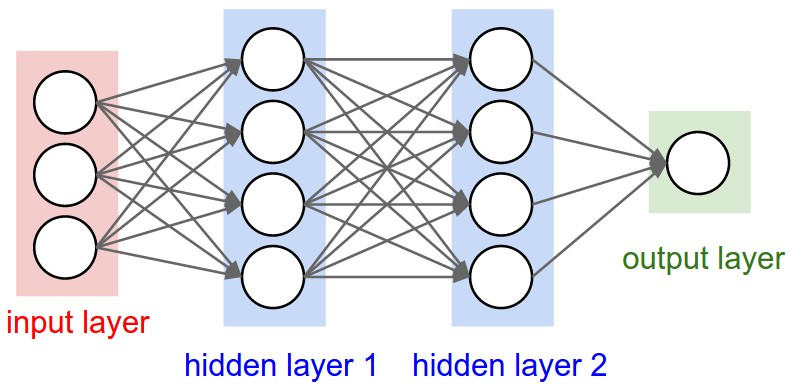

In [32]:
from IPython.display import Image

Image('https://cs231n.github.io/assets/nn1/neural_net2.jpeg')

위의 그림을 코드로 작성한다면 대략 다음과 같은 코드가 나올 겁니다.  
model.add(Dense(4, input_dim=3, activation='relu')   
model.add(Dense(4, activation='relu')  
model.add(Dense(1, activation='relu')

In [33]:
model.add(Dense(1, input_dim=1, activation='linear'))

## 적절한 optimizer와 loss 선정하기

우리는 적절한 회귀 값을 예측하는 모델을 만들어야 합니다.  

regression(회귀) 예측을 위해서는 loss=mse를 선택합니다.  

optimizer는 여러가지를 활용할 수는 있지만, 단순 회귀에는 sgd가 적당합니다.

## compile

선정한 optimizer와 loss를 지정해주고 compile 합니다.

In [36]:
model.compile(optimizer='sgd', loss='mse')

## fit

이제, 모델에 학습을 진행해야합니다. fit() 메소드를 활용하여 학습을 진행합니다.  

학습시, feature, label 값 지정 그리고 epochs을 지정합니다.

In [37]:
model.fit(xs, ys, epochs=1200, verbose=0)

## Predict

잘 학습이 되어있는지 검증합니다.

In [38]:
# output
# 16.000046
model.predict([10.0])

array([[16.000006]], dtype=float32)

#케라스로 다우 존스와 코스피 지수 선형 회귀

In [39]:
from tensorflow.keras.layers     import Dense
from tensorflow.keras.models     import Sequential
from tensorflow.keras.callbacks  import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [40]:
X_train = np.array(df['DOW'])
y_train = np.array(df['KOSPI'])

In [41]:
print(X_train[:5])
print(y_train[:5])

[10024.02 10249.54 10255.28  9931.97  9816.49]
[1630.4  1661.84 1661.84 1664.13 1637.97]


In [42]:
# 모델의 정의 (modeling)
model = Sequential()

# Dense의 첫번째 인자는 항상 출력의 차원을 의미한다.
model.add(Dense(1, input_dim=1, activation='linear'))

adam = Adam(lr=0.05)

# 모델의 생성 (compile)
model.compile(optimizer=adam, loss='mse')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [43]:
# 학습 (fit)
model.fit(X_train, y_train, epochs=1200, verbose=1)

Epoch 1/1200
99/99 [==============================] - 1s 2ms/step - loss: 142263200.0000
Epoch 2/1200
99/99 [==============================] - 0s 2ms/step - loss: 235545.6875
Epoch 3/1200
99/99 [==============================] - 0s 2ms/step - loss: 230737.4688
Epoch 4/1200
99/99 [==============================] - 0s 2ms/step - loss: 230446.3906
Epoch 5/1200
99/99 [==============================] - 0s 2ms/step - loss: 230362.4844
Epoch 6/1200
99/99 [==============================] - 0s 2ms/step - loss: 230844.3906
Epoch 7/1200
99/99 [==============================] - 0s 2ms/step - loss: 230342.9219
Epoch 8/1200
99/99 [==============================] - 0s 2ms/step - loss: 230712.1406
Epoch 9/1200
99/99 [==============================] - 0s 2ms/step - loss: 231222.6719
Epoch 10/1200
99/99 [==============================] - 0s 2ms/step - loss: 230950.3750
Epoch 11/1200
99/99 [==============================] - 0s 2ms/step - loss: 230966.9062
Epoch 12/1200
99/99 [============================

In [44]:
weight = model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]

In [45]:
print(weight)

[[0.05870418]]


In [46]:
print(bias)

[1315.8705]


$$코스피 지수 = 0.037 × 다우존스 지수 + 1380$$  

# Quiz

## Quiz #1

In [49]:
# 필요한 패키지 import
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

다음과 같이 데이터가 있을 때 이를 이용하여 Keras를 이용한 선형 회귀 모델을 만들고, fit()을 통해서 학습하세요. 단, 옵타마이저는 'adam'으로하고, 에포크는 3000으로 합니다.

In [50]:
# Training set
train_x = np.array([[400, 180, 200], [430, 140, 305], [405, 255, 300],
                [180, 180, 180], [220, 100, 160], [405, 255, 300],
                [500, 350, 440], [1500, 900, 200], [1500, 900, 900],
                [1000, 1000, 1000]], dtype=float)
train_y = np.array([4.20, 4.85, 6, 3.50, 2.70, 6.50, 11, 20.5, 39.8, 35.3], dtype=float)

In [54]:
model = Sequential()

model.add(Dense(1,input_dim=3,activation='linear'))

model.compile(optimizer='adam', loss='mse')

model.fit(train_x,train_y,epochs=3000,verbose=1)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 6ms/step - loss: 39262.4961
Epoch 502/3000
1/1 [==============================] - 0s 5ms/step - loss: 39201.3750
Epoch 503/3000
1/1 [==============================] - 0s 5ms/step - loss: 39140.2891
Epoch 504/3000
1/1 [==============================] - 0s 5ms/step - loss: 39079.2422
Epoch 505/3000
1/1 [==============================] - 0s 6ms/step - loss: 39018.2383
Epoch 506/3000
1/1 [==============================] - 0s 5ms/step - loss: 38957.2695
Epoch 507/3000
1/1 [==============================] - 0s 5ms/step - loss: 38896.3398
Epoch 508/3000
1/1 [==============================] - 0s 5ms/step - loss: 38835.4531
Epoch 509/3000
1/1 [==============================] - 0s 6ms/step - loss: 38774.6055
Epoch 510/3000
1/1 [==============================] - 0s 5ms/step - loss: 38713.7930
Epoch 511/3000
1/1 [==============================] - 0s 6ms/step - loss: 38653.0234
Epoch 512/3000
1/1 [========================

## Quiz #1 풀이

In [ ]:
# 모델의 정의 (modeling)
model = Sequential()

# Dense의 첫번째 인자는 항상 출력의 차원을 의미한다.
model.add(Dense(1, input_dim=3, activation='linear'))

# 모델의 생성 (compile)
model.compile(optimizer='adam', loss='mse')

# 학습 (fit)
model.fit(train_x, train_y, epochs=3000, verbose=1)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 501/3000
1/1 [==============================] - 0s 6ms/step - loss: 168756.1562
Epoch 502/3000
1/1 [==============================] - 0s 5ms/step - loss: 167926.6562
Epoch 503/3000
1/1 [==============================] - 0s 5ms/step - loss: 167100.5625
Epoch 504/3000
1/1 [==============================] - 0s 12ms/step - loss: 166277.8594
Epoch 505/3000
1/1 [==============================] - 0s 4ms/step - loss: 165458.5781
Epoch 506/3000
1/1 [==============================] - 0s 7ms/step - loss: 164642.6562
Epoch 507/3000
1/1 [==============================] - 0s 3ms/step - loss: 163830.1094
Epoch 508/3000
1/1 [==============================] - 0s 4ms/step - loss: 163020.9688
Epoch 509/3000
1/1 [==============================] - 0s 4ms/step - loss: 162215.1719
Epoch 510/3000
1/1 [==============================] - 0s 7ms/step - loss: 161412.6875
Epoch 511/3000
1/1 [==============================] - 0s 9ms/step - loss: 160613.5625
Epoch 512/3000
1/

## Quiz #2

Quiz #1과 이어지는 퀴즈이다. model.predict()를 이용하여 임의의 입력 [450, 190, 280] 에대한 예측값을 얻어보시오.

In [56]:
test_v = [450, 190, 280]
model.predict([test_v])

array([[5.423934]], dtype=float32)

## Quiz #2 풀이

In [ ]:
model.predict([[450, 190, 280]])

array([[-13.710249]], dtype=float32)

## Quiz #3

평균 제곱 오차를 파이썬 코드를 통해서 구현하세요.  
임의로 실제값과 예측값을 만들어서 실제로 평균 제곱 오차를 계산해보세요.

힌트 : 구글에 Numpy mean squared error를 검색하시면 많은 글이 나옵니다.

In [60]:
import numpy

y_true = [4.20, 4.85, 6, 3.50, 2.70]
y_predict = model.predict([[400, 180, 200], [430, 140, 305], [405, 255, 300],
                [180, 180, 180], [220, 100, 160]])
print(y_predict)

MSE = np.square(np.subtract(y_true,y_predict)).mean()
print(MSE)

[[4.5270257]
 [3.9229782]
 [9.0625   ]
 [7.161492 ]
 [2.9528773]]
7.978631005436868


## Quiz #3 풀이

In [ ]:
import numpy as np

Y_true = 

MSE = np.square(np.subtract(Y_true, Y_pred)).mean()